In [1]:
import os
import sys
import cv2

import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from loaders.datasets import AmsterdamDataset
from utils.general import visualize
from utils.augmentation import *

In [2]:
transform = get_amsterdam_augmentation()

In [3]:
images = os.path.join('..', 'data', 'fences-quays', 'images')
annotations = os.path.join('..', 'data', 'fences-quays', 'annotations', 'test-annotations-11px.json')

data = AmsterdamDataset(images, annotations, transform=transform)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


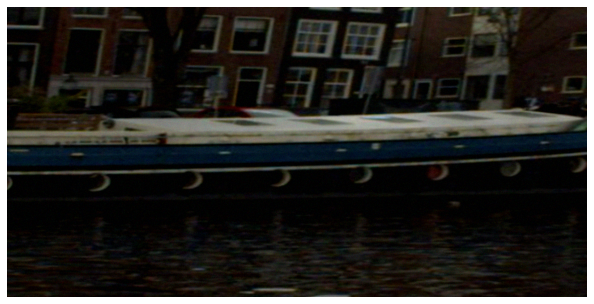

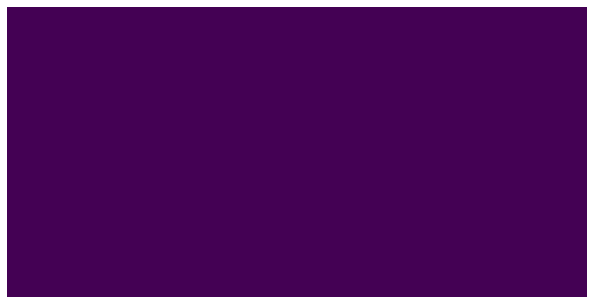

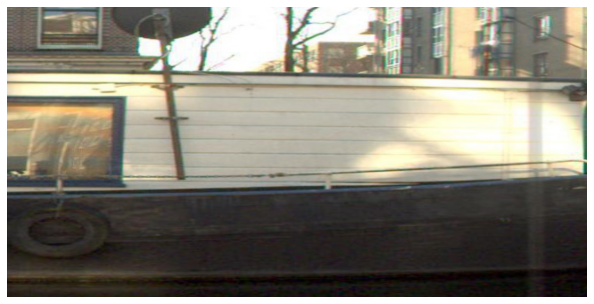

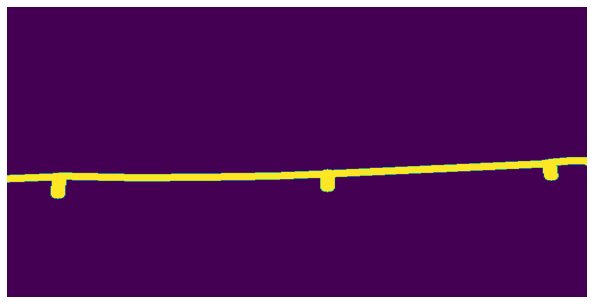

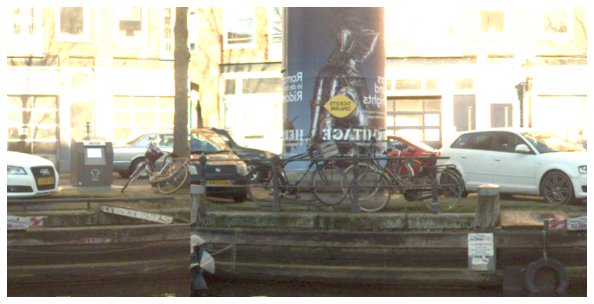

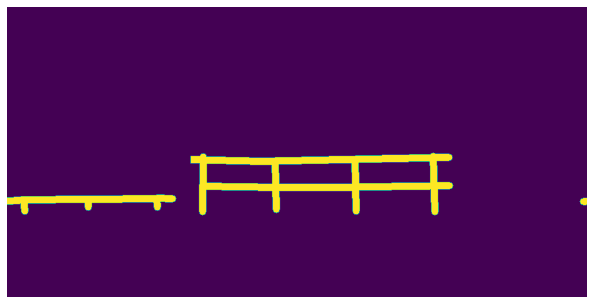

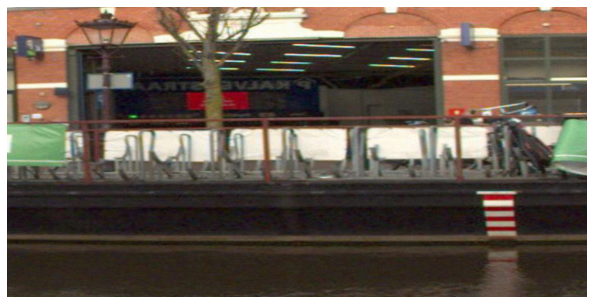

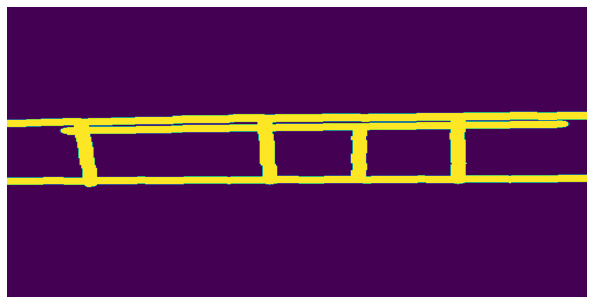

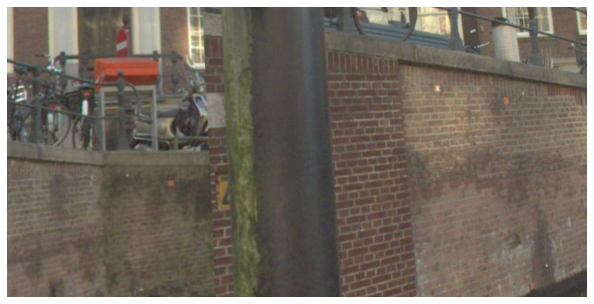

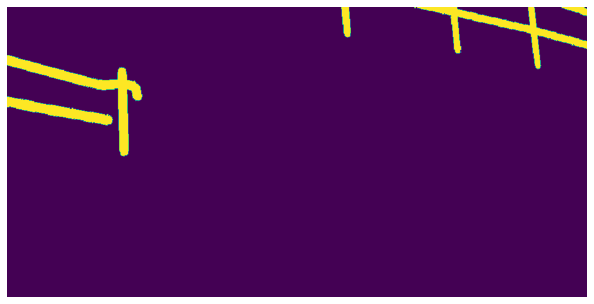

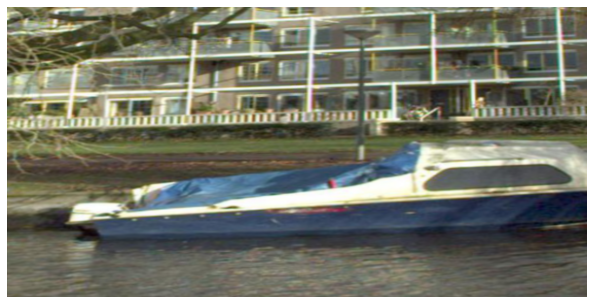

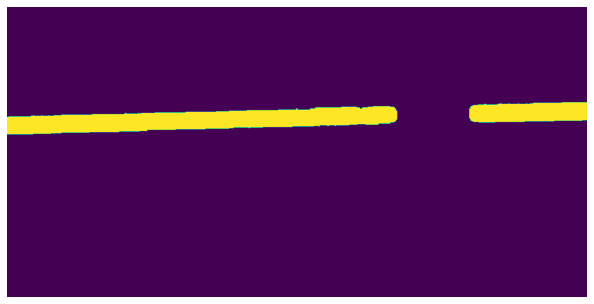

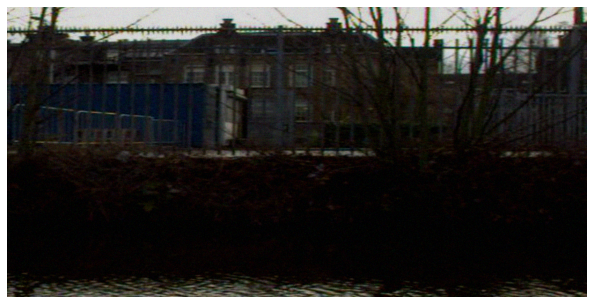

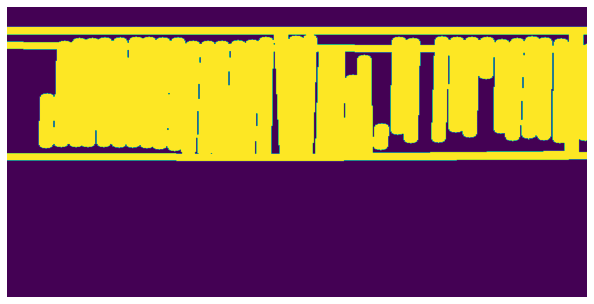

In [4]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (1024/96, 512/96)

for i, (image, mask) in enumerate(data):
#     print(type(image))
#     print(image.shape)
#     visualize(image=image, mask=mask)

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    plt.imshow(mask)
    plt.axis('off')
    plt.show()
    
    if i > 5:
        break

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


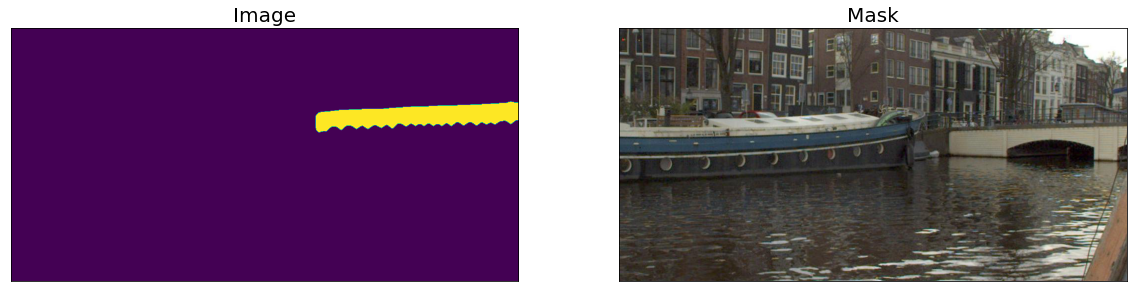

In [5]:
import albumentations as A

transform = A.Compose([A.Blur((11, 11), p=1)])

data = AmsterdamDataset(images, annotations)

image, mask = data[0]

transformed = transform(image=mask, mask=image)

image, mask = transformed['image'] > 0, transformed['mask']

visualize(image=image, mask=mask)

In [6]:
for i, (image, mask) in enumerate(data):
    img = plt.imread(os.path.join(images, data.images[i]['file_name']))

#     targets.append(np.expand_dims(mask, axis=0))

    mask = np.squeeze(mask)
    x = torch.as_tensor(image).unsqueeze(0).cuda()

    with torch.no_grad():
        pred = model(x)

#     preds.append(pred)

    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    plt.imshow((pred > .5).squeeze().cpu())
    plt.axis('off')
    plt.show()
    
    plt.imshow(mask)
    plt.axis('off')
    plt.show()

NameError: name 'torch' is not defined